## 目录
- Groupby和Aggregate
- transform
- 表格的匹配与拼接

## Groupby and Aggregate

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

    Name  Year  Salary  Bonus
0   July  2016   10000   3000
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
3    Han  2016    5000   1200
4   July  2017   18000   4000
5   July  2017   25000   2300
6  Zewei  2017    3000    500
7   July  2017    4000   1000


Group By 演示

In [2]:
group_by_name = salaries.groupby('Name').size()
print(group_by_name)
print(group_by_name.sum())

Name
Han      1
July     4
Zewei    3
dtype: int64
8


groupby构造了一个GroupBy object，我们可以对这个object做各种操作，比如求个和，当然我们后面还会详细的介绍各种GroupBy之后的操作

groupby还有一些高级的用法，我们来看看[官方文档](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [3]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),'D' : np.random.randn(8), 
                   'E' : np.random.randn(8)})
df

,A,B,C,D,E
0,foo,one,-1.169292,1.574812,0.628256
1,bar,one,-0.023665,-0.561936,0.309972
2,foo,two,2.332665,1.116966,1.715325
3,bar,three,0.201558,0.800382,0.466807
4,foo,two,-0.454832,-0.735385,1.687511
5,bar,two,1.100805,-0.987718,1.368078
6,foo,one,0.130616,0.831588,1.366661
7,foo,three,0.138118,0.943290,-0.290864


In [4]:
def get_letter_type(letter):
    print(letter)
    if letter.lower() in "aeiou":
        return "vowel"
    else:
        return "consonant"

In [5]:
# If by is a function, it’s called on each value of the object’s index

grouped = df.groupby(get_letter_type, axis=1)

print(grouped)
print("\n")

# 分成了两组，consonant&vowel，第一组有B、C、D，第二组有A，E
print(grouped.size())
print(grouped.groups)
print(type(grouped.groups))

A
B
C
D
E


consonant    3
vowel        2
dtype: int64
{'consonant': Index(['B', 'C', 'D'], dtype='object'), 'vowel': Index(['A', 'E'], dtype='object')}
<class 'dict'>


In [6]:
# 每一行B、C、D的最大值，A、E的最大值
grouped.max()

,consonant,vowel
0,1.574812,0.628256
1,-0.023665,0.309972
2,2.332665,1.715325
3,0.800382,0.466807
4,-0.454832,1.687511
5,1.100805,1.368078
6,0.831588,1.366661
7,0.943290,-0.290864


### groupby之后一般要有一些aggregate操作

In [7]:
group_by_name = salaries.groupby('Name')
group_by_name.sum()

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,8067,57000,10300
Zewei,6049,9000,2500


默认会排序，也可以选择不排序

In [8]:
salaries.groupby('Name', sort=False).sum()

,Year,Salary,Bonus
Name,,,
July,8067,57000,10300
Zewei,6049,9000,2500
Han,2016,5000,1200


也可以这么写

In [9]:
# group_by_name.aggregate(sum)
group_by_name.agg(sum)

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,8067,57000,10300
Zewei,6049,9000,2500


group by的attributes

In [10]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


### 可以用多个columns做group by

In [11]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Salary  Bonus
Name  Year               
Han   2016    5000   1200
July  2016   10000   3000
      2017   47000   7300
Zewei 2016    6000   2000
      2017    3000    500

除了sum之外，我们再来尝试一下size,mean,median 

In [12]:
group_by_name.size()

Name
Han      1
July     4
Zewei    3
dtype: int64

In [13]:
group_by_name.mean()

,Year,Salary,Bonus
Name,,,
Han,2016.000000,5000.0,1200.000000
July,2016.750000,14250.0,2575.000000
Zewei,2016.333333,3000.0,833.333333


In [14]:
group_by_name.median()

,Year,Salary,Bonus
Name,,,
Han,2016,5000,1200
July,2017,14000,2650
Zewei,2016,3000,1000


In [15]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [16]:
for name, group in group_by_name:
    print(name)
    print(group)

Han
  Name  Year  Salary  Bonus
3  Han  2016    5000   1200
July
   Name  Year  Salary  Bonus
0  July  2016   10000   3000
4  July  2017   18000   4000
5  July  2017   25000   2300
7  July  2017    4000   1000
Zewei
    Name  Year  Salary  Bonus
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
6  Zewei  2017    3000    500


选择一个group

In [17]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))

    Name  Year  Salary  Bonus
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
6  Zewei  2017    3000    500


pandas.core.frame.DataFrame

对每一列可以采用不同的aggregate操作

In [18]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.mean})

,Bonus,Salary
Name,,
Han,1200,5000
July,10300,14250
Zewei,2500,3000


In [19]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum, "Year": (lambda x: list(x)[0])})

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,2016
Zewei,2500,9000,2016


In [20]:
group_by_name_year.describe()

Bonus                                                           \
           count         mean         std     min     25%     50%     75%   
Name  Year                                                                  
Han   2016   1.0  1200.000000         NaN  1200.0  1200.0  1200.0  1200.0   
July  2016   1.0  3000.000000         NaN  3000.0  3000.0  3000.0  3000.0   
      2017   3.0  2433.333333  1504.43788  1000.0  1650.0  2300.0  3150.0   
Zewei 2016   2.0  1000.000000     0.00000  1000.0  1000.0  1000.0  1000.0   
      2017   1.0   500.000000         NaN   500.0   500.0   500.0   500.0   

                   Salary                                                \
               max  count          mean           std      min      25%   
Name  Year                                                                
Han   2016  1200.0    1.0   5000.000000           NaN   5000.0   5000.0   
July  2016  3000.0    1.0  10000.000000           NaN  10000.0  10000.0   
      2017  4000.0    3.0  15666.666667  10692.676622   4000.0  11000.0   
Zewei 2016  1000.0    2.0   3000.000000   1414.213562   2000.0   2500.0   
      2017   500.0    1.0   3000.000000           NaN   3000.0   3000.0   

                                       
                50%      75%      max  
Name  Year                             
Han   2016   5000.0   5000.0   5000.0  
July  2016  10000.0  10000.0  10000.0  
      2017  18000.0  21500.0  25000.0  
Zewei 2016   3000.0   3500.0   4000.0  
      2017   3000.0   3000.0   3000.0

### transform
transform会把group中的每一个record都按照同样的规则转化

In [21]:
nvda = pd.read_csv("NVDA.csv", index_col=0)
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [22]:
key = lambda x: x[:4]
nvda.groupby(key).mean().head(9)

,Open,High,Low,Close,Adj Close,Volume
1999,1.950782,2.007317,1.883559,1.947230,1.808134,6.433220e+06
2000,8.781084,9.222697,8.360522,8.778826,8.151729,1.104182e+07
2001,13.091254,13.600750,12.680548,13.181552,12.239956,2.782387e+07
2002,9.690344,9.955093,9.344391,9.614749,8.927940,3.168655e+07
2003,5.902434,6.042659,5.764960,5.900344,5.478865,2.430220e+07
2004,6.484735,6.608810,6.353558,6.465913,6.004034,1.706331e+07
2005,9.512381,9.659656,9.353175,9.513823,8.834223,1.542825e+07
2006,18.057902,18.425126,17.720279,18.095963,16.803316,1.534446e+07
2007,27.762045,28.251673,27.206056,27.724542,25.744098,1.514562e+07


In [23]:
# 同一分组中，每一个record都进行同样的转化

zscore = lambda x: (x-x.mean())/x.std()
transformed = nvda.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


我们来尝试一下把这些数据画出来

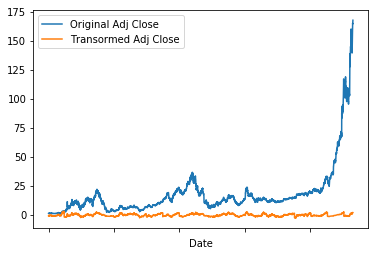

In [24]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

In [25]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(key).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [26]:
nvda.groupby(key).transform(np.min).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.395833,1.421875,1.333333,1.364583,1.267107,492000
1999-01-25,1.395833,1.421875,1.333333,1.364583,1.267107,492000
1999-01-26,1.395833,1.421875,1.333333,1.364583,1.267107,492000
1999-01-27,1.395833,1.421875,1.333333,1.364583,1.267107,492000
1999-01-28,1.395833,1.421875,1.333333,1.364583,1.267107,492000


In [27]:
(nvda.groupby(key).transform("max") - nvda.groupby(key).transform("min")).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200


- filter

比如我们想要找出符合统计特征的一些内容，就像SQL里面的having, where语句

In [28]:
s = pd.Series([1,1,2,2,2,3,4,4,5])
s.groupby(s).filter(lambda x: x.sum() > 4)

2    2
3    2
4    2
6    4
7    4
8    5
dtype: int64

In [29]:
df = pd.DataFrame({"A": np.arange(8), "B":list("aaabbbcc")})
# df
# df.groupby("B").filter(lambda x: len(x) > 2)

我们来看看均价超过100的有哪些月份

In [30]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [31]:
key_month = lambda x: x[0:7]

In [32]:
nvda.groupby(key_month).filter(lambda x: x["Adj Close"].mean() > 50).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-01,46.750000,47.360001,46.500000,46.660000,46.397064,5462200
2016-07-05,46.400002,47.430000,46.029999,47.349998,47.083176,9277100
2016-07-06,47.020000,47.930000,46.779999,47.650002,47.381493,6827600
2016-07-07,47.970001,49.060001,47.750000,48.889999,48.614498,9885000
2016-07-08,49.410000,51.090000,49.220001,50.849998,50.563454,12048300


- apply

In [33]:
nvda_month = nvda.groupby(key_month)
nvda_month

In [34]:
def zscored(group):
    return pd.DataFrame({"original": group,
                        "zscore": (group - group.mean()) / group.std()})
nvda_month["Adj Close"].apply(zscored).tail()

,original,zscore
Date,,
2017-07-14,164.949997,0.849678
2017-07-17,164.250000,0.780176
2017-07-18,165.960007,0.949960
2017-07-19,165.100006,0.864572
2017-07-20,167.500000,1.102863



## 表格匹配与拼接

- concat
- append
- merge
- join

In [35]:
import pandas as pd
import numpy as np

In [36]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [37]:
df2 = pd.DataFrame({'cars': [150000, 120000],
                    'apts': [25000, 20000],
                   },
                  index = ['Hangzhou', 'Najing'])
print(df2)

            cars   apts
Hangzhou  150000  25000
Najing    120000  20000


In [38]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)

            apts    cars
Guangzhou  30000  180000
Chongqing  10000  100000


### concatenate

In [39]:
frames = [df1, df2, df3] 
result = pd.concat(frames)
print(result)

            apts    cars
Shanghai   55000  200000
Beijing    60000  300000
Hangzhou   25000  150000
Najing     20000  120000
Guangzhou  30000  180000
Chongqing  10000  100000


/home/andy/applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [40]:
result2 = pd.concat(frames, keys=['x', 'y', 'z'])
print(result2)

              apts    cars
x Shanghai   55000  200000
  Beijing    60000  300000
y Hangzhou   25000  150000
  Najing     20000  120000
z Guangzhou  30000  180000
  Chongqing  10000  100000


/home/andy/applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [41]:
result2.loc["y"]

,apts,cars
Hangzhou,25000,150000
Najing,20000,120000


In [42]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [43]:
result3 = pd.concat([result, df4], axis=1)
print(result3)

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Chongqing  10000.0  100000.0       NaN
Guangzhou  30000.0  180000.0   20000.0
Hangzhou   25000.0  150000.0       NaN
Najing     20000.0  120000.0       NaN
Shanghai   55000.0  200000.0   30000.0
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


/home/andy/applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


复习一下前面讲过的stack

In [44]:
# result3
print(result3.stack())
print(type(result3.stack()))

Beijing    apts         60000.0
           cars        300000.0
           salaries     30000.0
Chongqing  apts         10000.0
           cars        100000.0
Guangzhou  apts         30000.0
           cars        180000.0
           salaries     20000.0
Hangzhou   apts         25000.0
           cars        150000.0
Najing     apts         20000.0
           cars        120000.0
Shanghai   apts         55000.0
           cars        200000.0
           salaries     30000.0
Suzhou     salaries     10000.0
Tianjin    salaries     15000.0
dtype: float64
<class 'pandas.core.series.Series'>


In [45]:
result

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [46]:
result3 = pd.concat([result, df4], axis=1, join='inner')
print(result3)

            apts    cars  salaries
Shanghai   55000  200000     30000
Beijing    60000  300000     30000
Guangzhou  30000  180000     20000


In [47]:
df4

,salaries
Suzhou,10000
Beijing,30000
Shanghai,30000
Guangzhou,20000
Tianjin,15000


#### 用```append```来做concatenation

In [48]:
print(df1.append(df2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Hangzhou  25000  150000
Najing    20000  120000


/home/andy/applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [49]:
print(df1.append(df4))

              apts      cars  salaries
Shanghai   55000.0  200000.0       NaN
Beijing    60000.0  300000.0       NaN
Suzhou         NaN       NaN   10000.0
Beijing        NaN       NaN   30000.0
Shanghai       NaN       NaN   30000.0
Guangzhou      NaN       NaN   20000.0
Tianjin        NaN       NaN   15000.0


/home/andy/applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [50]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [51]:
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [52]:
print(pd.concat([df1, s1], axis=1))

           apts    cars  meal
Shanghai  55000  200000    60
Beijing   60000  300000    50


下面讲如何append一个row到DataFrame里。

In [53]:
s2 = pd.Series([18000, 12000], index=['apts', 'cars'], name='Xiamen') #注意这里的name是必须要有的，因为要用作Index。
print(s2)

apts    18000
cars    12000
Name: Xiamen, dtype: int64


In [54]:
print(df1.append(s2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Xiamen    18000   12000


### Merge(Join)

In [55]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                    'cars': [200000, 300000,250000],
                    'city': ['Shanghai', 'Beijing','Shenzhen']})
print(df1)

    apts    cars      city
0  55000  200000  Shanghai
1  60000  300000   Beijing
2  58000  250000  Shenzhen


In [56]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],
                  'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})
print(df4)

   salaries       city
0     10000     Suzhou
1     30000    Beijing
2     30000   Shanghai
3     20000  Guangzhou
4     15000    Tianjin


In [57]:
result = pd.merge(df1, df4, on='city',how='inner')
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [58]:
result = pd.merge(df1, df4)
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [59]:
result = pd.merge(df1, df4, on='city', how='outer')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai   30000.0
1  60000.0  300000.0    Beijing   30000.0
2  58000.0  250000.0   Shenzhen       NaN
3      NaN       NaN     Suzhou   10000.0
4      NaN       NaN  Guangzhou   20000.0
5      NaN       NaN    Tianjin   15000.0


In [60]:
result = pd.merge(df1, df4, on='city', how='right')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai     30000
1  60000.0  300000.0    Beijing     30000
2      NaN       NaN     Suzhou     10000
3      NaN       NaN  Guangzhou     20000
4      NaN       NaN    Tianjin     15000


In [61]:
result = pd.merge(df1, df4, on='city', how='left')
print(result)

    apts    cars      city  salaries
0  55000  200000  Shanghai   30000.0
1  60000  300000   Beijing   30000.0
2  58000  250000  Shenzhen       NaN


#### join on index

In [62]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000]},
                  index=['Shanghai', 'Beijing','Shenzhen'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Shenzhen  58000  250000


In [63]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index=['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [64]:
print(df1.join(df4))

           apts    cars  salaries
Shanghai  55000  200000   30000.0
Beijing   60000  300000   30000.0
Shenzhen  58000  250000       NaN


In [65]:
print(df1.join(df4, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Guangzhou      NaN       NaN   20000.0
Shanghai   55000.0  200000.0   30000.0
Shenzhen   58000.0  250000.0       NaN
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0


也可以用merge来写

In [66]:
print(pd.merge(df1, df4, left_index=True, right_index=True, how='outer'))

              apts      cars  salaries
Beijing    60000.0  300000.0   30000.0
Guangzhou      NaN       NaN   20000.0
Shanghai   55000.0  200000.0   30000.0
Shenzhen   58000.0  250000.0       NaN
Suzhou         NaN       NaN   10000.0
Tianjin        NaN       NaN   15000.0
